# Parte 1

## Number recognition model

### Utils and data

In [39]:
from keras.datasets import mnist
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import joblib

def get_mnist_data():
    return mnist.load_data()

def vectorize(original):
    return original.reshape(original.shape[0], 28 * 28)

(x_train_o, y_train_o), (x_test_o, y_test_o) = get_mnist_data()
(x_train_o, y_train), (x_test_o, y_test) = (vectorize(x_train), y_train), (vectorize(x_test), x_test)

def obtain_data(amount = 100):
    train_size,test_size = int(len(x_train_o) * amount / 100), int(len(x_test_o) * amount / 100)
    x_train, y_train = x_train_o[:train_size], y_train_o[:train_size]
    x_test, y_test = x_test_o[:test_size], y_test_o[:test_size]

    return (vectorize(x_train), y_train), (vectorize(x_test), y_test)

def evaluate_model(model, x_test, y_test):
    # Predict and evaluate
    y_pred = model.predict(x_test)
    
    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

In [43]:
(x_train, y_train), (x_test, y_test) = obtain_data()

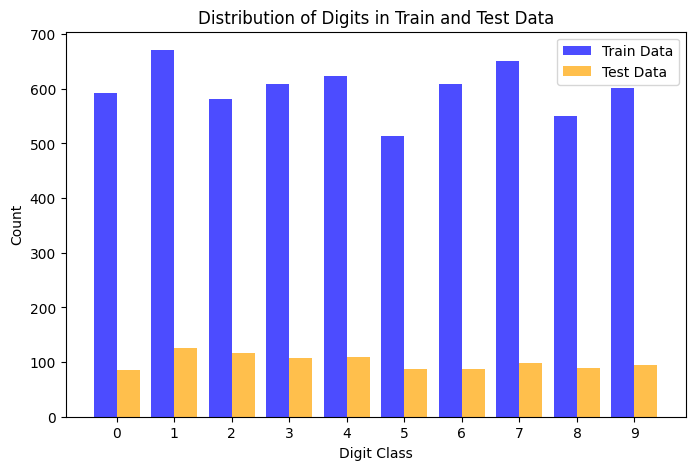

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Count occurrences of each class
train_counts = np.bincount(y_train)
test_counts = np.bincount(y_test)
classes = np.arange(10)  # Digits 0-9

# Create the bar chart
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(classes - 0.2, train_counts, width=0.4, label="Train Data", color="blue", alpha=0.7)
ax.bar(classes + 0.2, test_counts, width=0.4, label="Test Data", color="orange", alpha=0.7)

# Labels and title
ax.set_xticks(classes)
ax.set_xlabel("Digit Class")
ax.set_ylabel("Count")
ax.set_title("Distribution of Digits in Train and Test Data")
ax.legend()
plt.show()


### Logistic regression

In [45]:
(x_train, y_train), (x_test, y_test) = obtain_data(10)

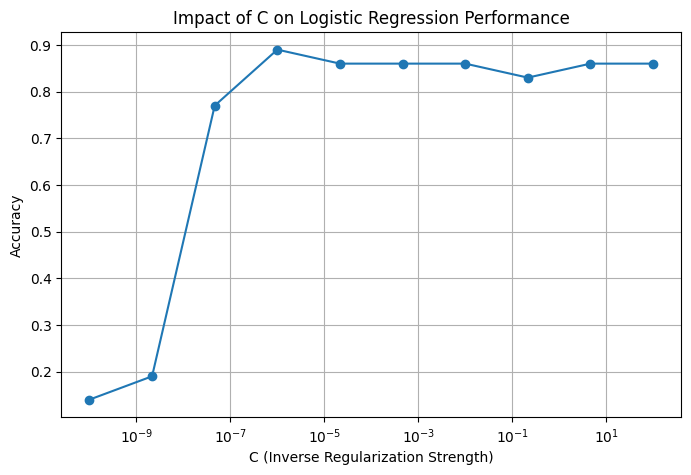

In [46]:
C_values = np.logspace(-10, 2, 10)  # Logarithmic scale from 0.001 to 1000
accuracies = []

# Train and evaluate the model for each C value
for C in C_values:
    model = LogisticRegression(n_jobs=-1, solver='lbfgs', max_iter=10000, random_state=42, tol=1e-4, C=C)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(C_values, accuracies, marker='o', linestyle='-')
plt.xscale('log')  # Log scale for better visualization
plt.xlabel("C (Inverse Regularization Strength)")
plt.ylabel("Accuracy")
plt.title("Impact of C on Logistic Regression Performance")
plt.grid(True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define tolerance values (from 1e-5 to 1e-2, increasing by a factor of 10)
tol_values = [1e-6 ,1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
accuracies = []

# Train and evaluate the model for each tolerance value
for tol in tol_values:
    model = LogisticRegression(n_jobs=-1, solver='lbfgs', max_iter=5000, random_state=42, tol=tol, C=0.001)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(tol_values, accuracies, marker='o', linestyle='-', color='b')
plt.xscale('log')  # Log scale for better visualization
plt.xlabel("Tolerance (tol)")
plt.ylabel("Accuracy")
plt.title("Effect of Tolerance on Model Accuracy")
plt.grid(True)
plt.show()


In [48]:
(x_train, y_train), (x_test, y_test) = obtain_data()

In [32]:
model = LogisticRegression(n_jobs=-1, solver='lbfgs',max_iter=10000, random_state=42, tol=1e-5, C=1e-6)
model.fit(x_train, y_train)

evaluate_model(model,x_test,y_test)
joblib.dump(model, "numbers_model.joblib")

Accuracy: 0.9244
Precision: 0.9243
Recall: 0.9244
F1 Score: 0.9242


['numbers_model.joblib']

### K-neighbours

In [72]:
(x_train, y_train), (x_test, y_test) = obtain_data()

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn = KNeighborsClassifier(n_jobs=-1)
grid_search = GridSearchCV(knn, param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Best Accuracy: 0.9355


In [81]:
# Create and train model with best parameters
model = KNeighborsClassifier(metric='euclidean', n_neighbors=6, weights='distance', n_jobs=-1)
model.fit(x_train, y_train)

# Evaluate model
evaluate_model(model, x_test, y_test)

# Save model
joblib.dump(model, "k_neighbors_numbers.joblib")

Accuracy: 0.9190
Precision: 0.9220
Recall: 0.9190
F1 Score: 0.9183


['k-neighbors-num.joblib']

### SVM

In [90]:
(x_train, y_train), (x_test, y_test) = obtain_data(50)

In [92]:
from sklearn.svm import SVC

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  
    'kernel': ['linear', 'rbf', 'poly'],  
    'gamma': ['scale', 'auto'],  
    'degree': [2, 3, 4]
}

# Create the model
svm = SVC()

# Perform GridSearchCV
grid_search = GridSearchCV(svm, param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
grid_search.fit(x_train, y_train)

# Print best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Best Accuracy: 0.9426666666666665


In [94]:
best_svm = SVC(**grid_search.best_params_)
best_svm.fit(x_train, y_train)

evaluate_model(best_svm, x_test, y_test)

joblib.dump(best_svm, "svm_numbers.joblib")

Accuracy: 0.9440
Precision: 0.9451
Recall: 0.9440
F1 Score: 0.9438


['svm_numbers.joblib']

## Symbol recognition

In [13]:
import cv2
import numpy as np
import os
from sklearn.model_selection import train_test_split

def load_images(directory):
    images = []
    for filename in os.listdir(directory):
        if filename.endswith('.jpg'):
            img = cv2.imread(os.path.join(directory, filename), cv2.IMREAD_UNCHANGED)
            img = cv2.resize(img, (28, 28))
            img[img == 255] = 238

            images.append(img)

    return np.array(images)

def create_dataset(plus_imgs, minus_imgs, div_imgs, slash_imgs, times_imgs):
   # Stack all images and create corresponding labels
   x_data = np.vstack((plus_imgs, minus_imgs, div_imgs, slash_imgs, times_imgs))
   
   # Create labels array
   y_data = np.concatenate([
       np.zeros(len(plus_imgs)),  # 0 for plus
       np.ones(len(minus_imgs)),  # 1 for minus
       np.full(len(div_imgs), 2), # 2 for div
       np.full(len(slash_imgs), 3), # 3 for slash
       np.full(len(times_imgs), 4)  # 4 for times
   ])

   # Split into train/test
   x_train, x_test, y_train, y_test = train_test_split(
       x_data, y_data, 
       test_size=0.30, 
       random_state=42,
       stratify=y_data  
   )
   
   return x_train, x_test, y_train, y_test


In [16]:

plus_imgs = load_images("./data/+")
minus_imgs = load_images("./data/-")
div_imgs = load_images("./data/div")
slash_imgs = load_images("./data/forward_slash")
times_imgs = load_images("./data/times")

# Create dataset
x_train, x_test, y_train, y_test = create_dataset(plus_imgs, minus_imgs, div_imgs, slash_imgs, times_imgs)

# Print info
print(f"Train shapes: X={x_train.shape}, y={y_train.shape}")
print(f"Test shapes: X={x_test.shape}, y={y_test.shape}")
print("\nClass distribution in train:", np.bincount(y_train.astype(int)))
print("Class distribution in test:", np.bincount(y_test.astype(int)))

Train shapes: X=(44398, 28, 28), y=(44398,)
Test shapes: X=(19029, 28, 28), y=(19029,)

Class distribution in train: [17578 23797   608   139  2276]
Class distribution in test: [ 7534 10200   260    60   975]


In [17]:
x_train_reshaped = x_train.reshape(x_train.shape[0], -1)
x_test_reshaped = x_test.reshape(x_test.shape[0], -1)

# Calculate class weights
unique_classes, class_counts = np.unique(y_train, return_counts=True)
weights = dict(zip(unique_classes, len(y_train) / (len(unique_classes) * class_counts)))

# Train logistic regression
model = LogisticRegression(
   class_weight=weights,
   max_iter=1000,
   random_state=42
)
model.fit(x_train_reshaped, y_train)

evaluate_model(model, x_test_reshaped, y_test)

joblib.dump(model, "symbols_model.joblib")

Accuracy: 0.9980
Precision: 0.9980
Recall: 0.9980
F1 Score: 0.9980


['symbols_model.joblib']

# Parte 2

## Opcion A